In [2]:
#@title 下載 cyclegan
! pip install dominate
! git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.git

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2447, done.
remote: Total 2447 (delta 0), reused 0 (delta 0), pack-reused 2447
Receiving objects: 100% (2447/2447), 8.18 MiB | 27.82 MiB/s, done.
Resolving deltas: 100% (1535/1535), done.


In [17]:
#@title 下載模型
#@markdown - apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower

model = 'style_monet' #@param {type:"string"}
print('Download Model:', model)
%cd /content/pytorch-CycleGAN-and-pix2pix
cmd = f'! bash ./scripts/download_cyclegan_model.sh {model}'
! $cmd

Download Model: style_monet
/content/pytorch-CycleGAN-and-pix2pix
Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [style_monet]
for details.

--2022-03-05 05:28:06--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_monet.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/style_monet_pretrained/latest_net_G.pth’

./checkpoints/style 100%[===================>]  43.46M  5.43MB/s    in 8.6s    

2022-03-05 05:28:14 (5.08 MB/s) - ‘./checkpoints/style_mo

/content
https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/President_Barack_Obama.jpg/1200px-President_Barack_Obama.jpg
--2022-03-05 05:28:17--  https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/President_Barack_Obama.jpg/1200px-President_Barack_Obama.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 308833 (302K) [image/jpeg]
Saving to: ‘src.jpg’

src.jpg             100%[===================>] 301.59K  --.-KB/s    in 0.07s   

2022-03-05 05:28:17 (3.97 MB/s) - ‘src.jpg’ saved [308833/308833]



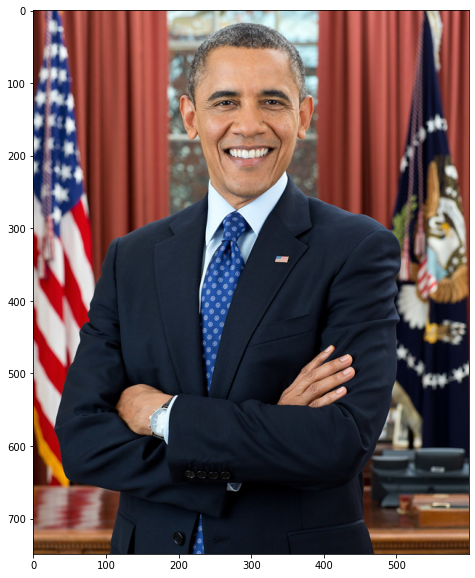

In [18]:
#@title 下載圖片
import os
from PIL import Image
from matplotlib import pyplot as plt
% cd /content/
! mkdir -p testimages
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/President_Barack_Obama.jpg/1200px-President_Barack_Obama.jpg' #@param {type:"string"}
print(url)
cmd=f"wget {url} -O src.jpg"  
! $cmd 
! mv src.jpg testimages/

if os.path.isfile('testimages/src.jpg'):
  im = Image.open('testimages/src.jpg')
  w_ = 600
  h_ = int((w_ / im.width) * im.height)  
  new_img = im.resize((w_,h_))
  plt.figure(figsize = (20,10))
  plt.imshow(new_img)


In [19]:
#@title 用CycleGAN 轉換圖片
% cd /content/pytorch-CycleGAN-and-pix2pix
cmd = f'python test.py --dataroot /content/testimages --name {model}_pretrained --model test --no_dropout'
! $cmd



/content/pytorch-CycleGAN-and-pix2pix
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /content/testimages           	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                lo

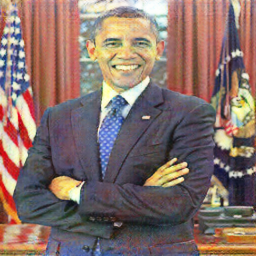

In [20]:
#@title show 出轉換後的圖片
from PIL import Image
Image.open(f'./results/{model}_pretrained/test_latest/images/src_fake.png')